In [1]:
# Load necessary libraries
import pandas as pd

# Load the dataset
data = pd.read_csv('Preprocess_Reviews.csv')

# Count the number of reviews for each brand
brand_counts = data['Brand Name'].value_counts().nlargest(5)

# Get the top 5 brands
top_brands = brand_counts.index.tolist()

# Filter the dataset to include only the top 5 brands
top_brands_data = data[data['Brand Name'].isin(top_brands)]

# Display the top brands
top_brands


['samsung', 'blu', 'apple', 'lg', 'blackberry']

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Download NLTK data files (stopwords)
nltk.download('punkt')
nltk.download('stopwords')

# Define stop words and punctuations
stop_words = set(stopwords.words('english'))
punctuations = set(string.punctuation)

# Function to preprocess reviews
def preprocess_review(review):
    if isinstance(review, str):  # Check if the review is a string
        tokens = word_tokenize(review.lower())
        filtered_tokens = [w for w in tokens if w not in stop_words and w not in punctuations]
        return filtered_tokens
    else:
        return []  # Return an empty list if the review is not a string

# Apply preprocessing to top brands data
top_brands_data['Processed Reviews'] = top_brands_data['Reviews'].apply(preprocess_review)

# Display the first few rows of the dataframe after preprocessing
top_brands_data.head()


[nltk_data] Downloading package punkt to C:\Users\MK
[nltk_data]     Jutt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\MK
[nltk_data]     Jutt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\MK Jutt\AppData\Local\Temp\ipykernel_19372\1411300317.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_brands_data['Processed Reviews'] = top_brands_data['Reviews'].apply(preprocess_review)


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,sentiment,neg,neu,pos,compound,Processed Reviews
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",samsung,199.99,5,feel lucky found used phone u used hard phone ...,1.0,positive,0.100,0.592,0.308,0.8966,"[feel, lucky, found, used, phone, u, used, har..."
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",samsung,199.99,4,nice phone nice grade pantach revue clean set ...,0.0,positive,0.155,0.445,0.400,0.8548,"[nice, phone, nice, grade, pantach, revue, cle..."
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",samsung,199.99,5,pleased,0.0,positive,0.000,0.000,1.000,0.4404,[pleased]
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",samsung,199.99,4,work good go slow sometimes good phone love,0.0,positive,0.000,0.333,0.667,0.8750,"[work, good, go, slow, sometimes, good, phone,..."
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",samsung,199.99,4,great phone replace lost phone thing volume bu...,0.0,positive,0.103,0.714,0.183,0.4215,"[great, phone, replace, lost, phone, thing, vo..."


In [3]:
# Sentiment distribution for the top 5 brands
sentiment_distribution_top_brands = top_brands_data.groupby(['Brand Name', 'sentiment']).size().unstack().fillna(0)

# Display sentiment distribution
print(sentiment_distribution_top_brands)


sentiment   negative  neutral  positive
Brand Name                             
apple          11155     2468     34446
blackberry      3928     1190      9296
blu            11152     4501     32467
lg              4336     1477     12540
samsung        11359     3775     39570


In [4]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [5]:
# Function to generate word cloud
def generate_wordcloud(tokens, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tokens))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

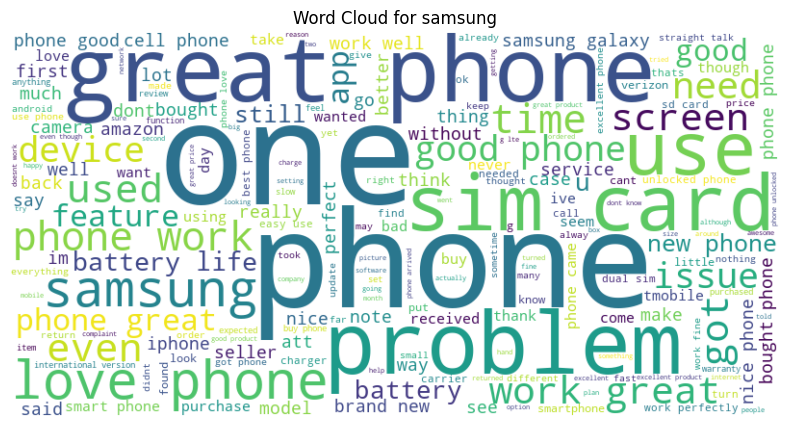

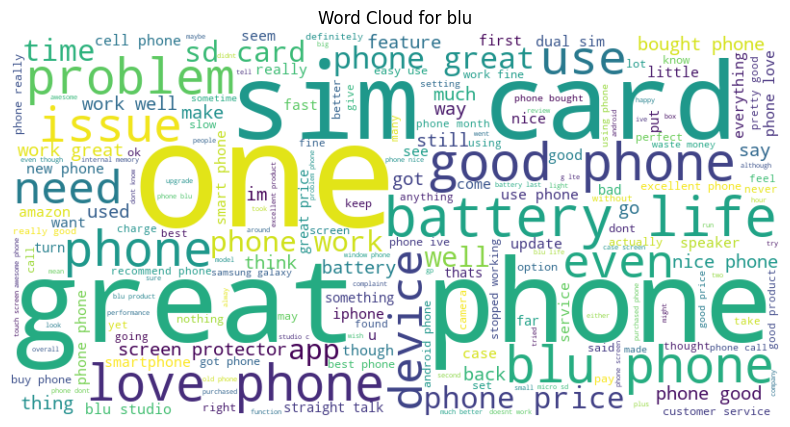

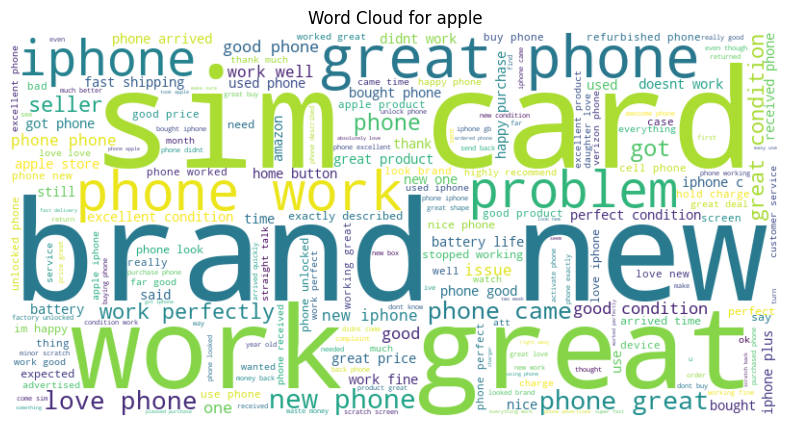

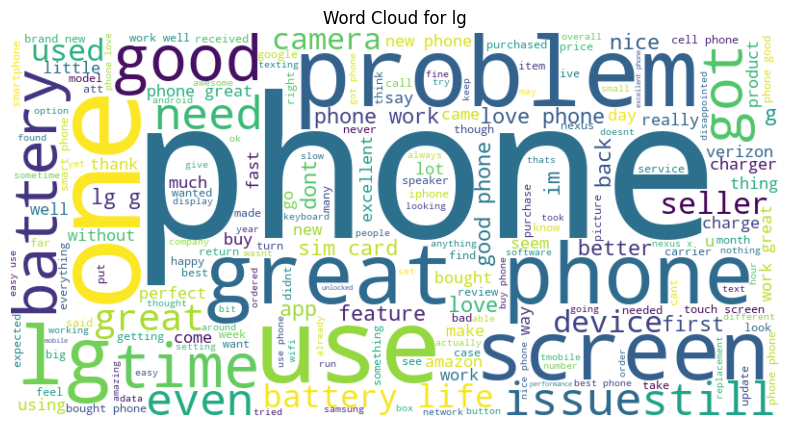

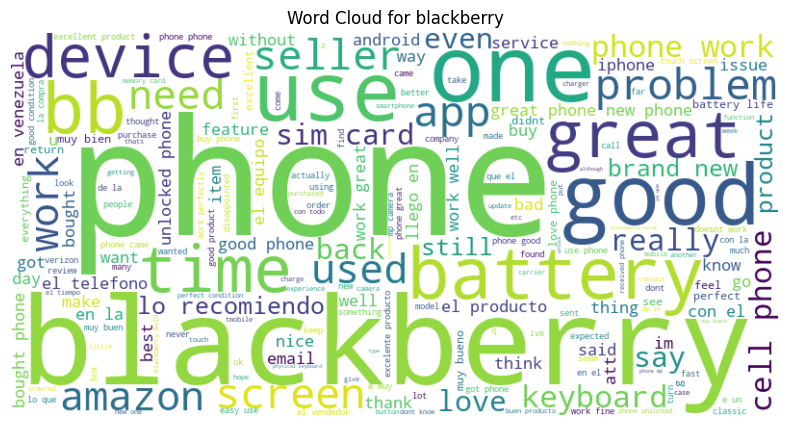

In [6]:
# Generate word cloud for each of the top 5 brands
for brand in top_brands:
    brand_reviews = top_brands_data[top_brands_data['Brand Name'] == brand]
    all_tokens = [token for sublist in brand_reviews['Processed Reviews'] for token in sublist]
    generate_wordcloud(all_tokens, f"Word Cloud for {brand}")


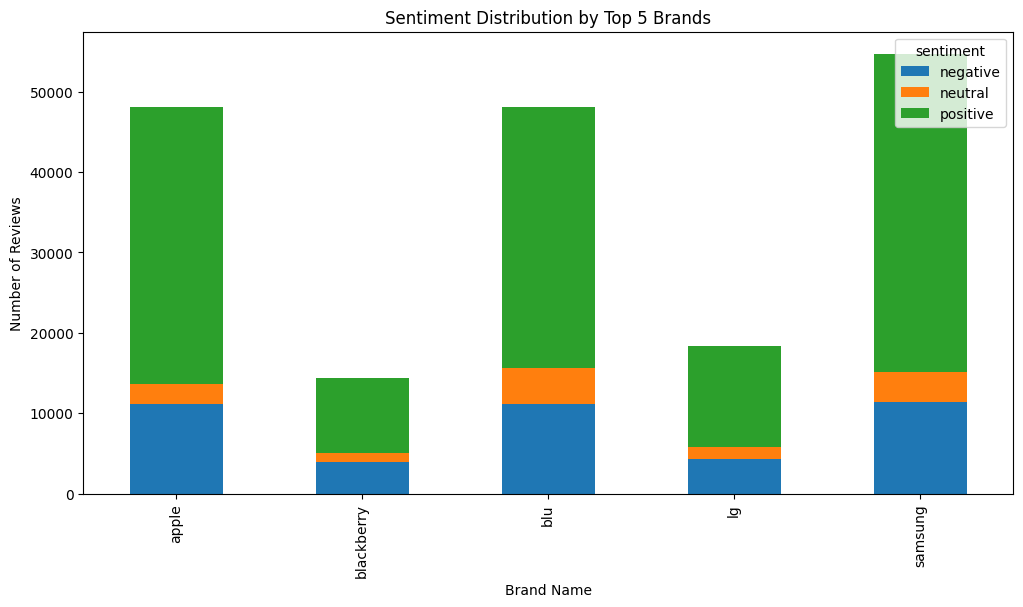

In [7]:
# Plot sentiment distribution
sentiment_distribution_top_brands.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Sentiment Distribution by Top 5 Brands')
plt.xlabel('Brand Name')
plt.ylabel('Number of Reviews')
plt.show()